In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/imdb-spoiler-dataset/IMDB_movie_details.json
/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

In [3]:
# Loadind IMDb spoiler dataset 
df = pd.read_json("/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json", lines=True)
df = df.head(10000)  
labels = df.is_spoiler.values
sentences = df.review_text.values





In [4]:
# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sentences, labels, test_size=0.3, random_state=42
)




In [5]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)  
train_vectors = vectorizer.fit_transform(train_texts)
test_vectors = vectorizer.transform(test_texts)



In [6]:
# Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)



MultinomialNB()

In [7]:
# Predictions
predictions = classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))

Test Accuracy: 71.67%
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.97      0.83      2069
        True       0.70      0.15      0.25       931

    accuracy                           0.72      3000
   macro avg       0.71      0.56      0.54      3000
weighted avg       0.71      0.72      0.65      3000



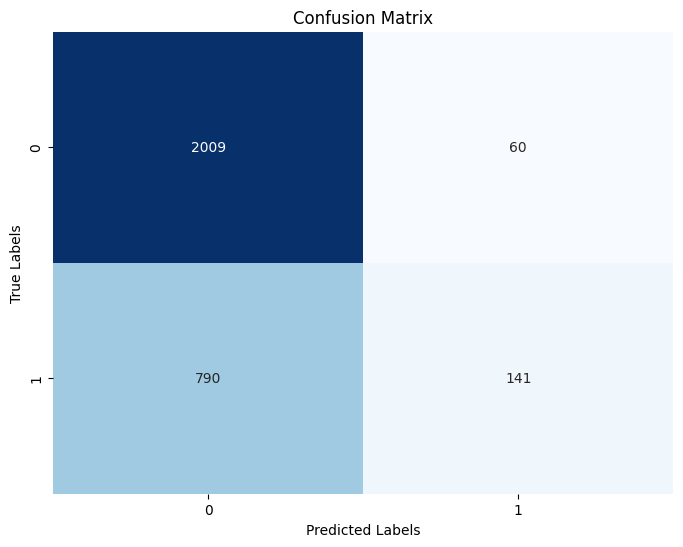

In [8]:


# Compute confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


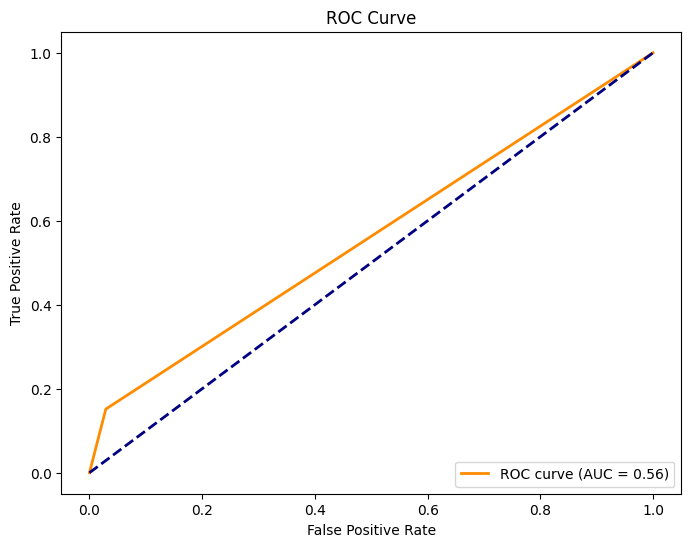

In [9]:


# Get ROC curve
fpr, tpr, _ = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


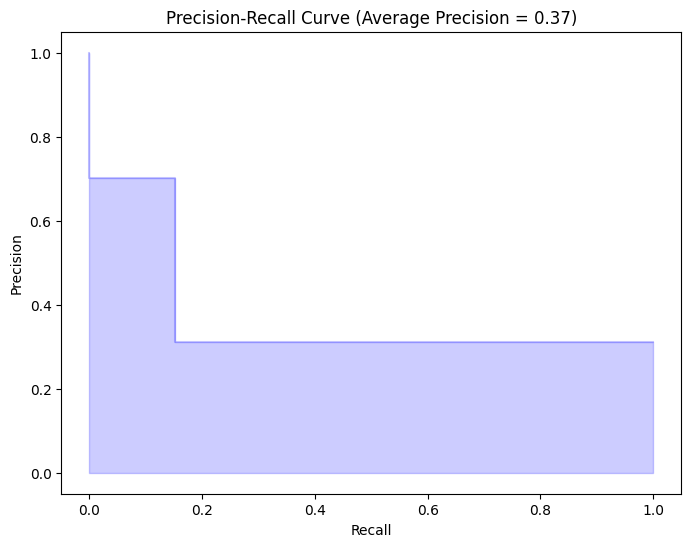

In [10]:


# Get precision-recall curve
precision, recall, _ = precision_recall_curve(test_labels, predictions)
average_precision = average_precision_score(test_labels, predictions)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Average Precision = {average_precision:.2f})')
plt.show()
